In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import random as rm
import time as tm
import matplotlib.pyplot as plt
from scipy import stats
from pandas.api.types import is_string_dtype 
from pandas.api.types import is_numeric_dtype 
import sklearn.metrics as skm
import sklearn.impute as ski
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
import math
import scipy.stats as stats
import statistics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [2]:
df1 = pd.read_csv('multivariate_eng_df.csv', index_col=0)
df1

,STATE,PROVINCE_STATE_NAME,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_65Plus,Series_Complete_Yes,Series_Complete_5Plus,...,vaccination_rate_complete,booster_rate,prop_age04,prop_age59,prop_age6064,prop_age8084,prop_age85plus,AGE04_29_TOT,AGE30_59_TOT,AGE60PLUS_TOT
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-01,6,California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,5.744418,6.165309,5.818187,1.716470,1.860398,13077768,15818572,8169914
2020-03-02,6,California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,5.744418,6.165309,5.818187,1.716470,1.860398,13077768,15818572,8169914
2020-03-03,6,California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,5.744418,6.165309,5.818187,1.716470,1.860398,13077768,15818572,8169914
2020-03-04,6,California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,5.744418,6.165309,5.818187,1.716470,1.860398,13077768,15818572,8169914
2020-03-05,6,California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,5.744418,6.165309,5.818187,1.716470,1.860398,13077768,15818572,8169914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,48,Texas,25120.6,20890120.0,20884105.0,19864532.0,18040473.0,3628247.0,17587233.0,17585807.0,...,0.585664,0.219948,6.335885,6.946010,5.387383,1.469608,1.337448,10530755,11768099,5644861
2022-04-26,48,Texas,25120.6,20897363.0,20891339.0,19869792.0,18044864.0,3628950.0,17591452.0,17590025.0,...,0.585804,0.221604,6.335885,6.946010,5.387383,1.469608,1.337448,10530755,11768099,5644861
2022-04-27,48,Texas,25120.6,20907738.0,20901703.0,19877395.0,18051163.0,3630034.0,17598026.0,17596598.0,...,0.586023,0.221844,6.335885,6.946010,5.387383,1.469608,1.337448,10530755,11768099,5644861


In [3]:
print(df1.columns.tolist())

['STATE', 'PROVINCE_STATE_NAME', 'Completeness_pct', 'Administered_Dose1_Recip', 'Administered_Dose1_Recip_5Plus', 'Administered_Dose1_Recip_12Plus', 'Administered_Dose1_Recip_18Plus', 'Administered_Dose1_Recip_65Plus', 'Series_Complete_Yes', 'Series_Complete_5Plus', 'Series_Complete_5to17', 'Series_Complete_12Plus', 'Series_Complete_18Plus', 'Series_Complete_65Plus', 'Booster_Doses', 'Booster_Doses_5Plus', 'Booster_Doses_12Plus', 'Booster_Doses_18Plus', 'Booster_Doses_50Plus', 'Booster_Doses_65Plus', 'Second_Booster_50Plus', 'Second_Booster_65Plus', 'Bivalent_Booster_5Plus', 'Bivalent_Booster_12Plus', 'Bivalent_Booster_18Plus', 'Bivalent_Booster_65Plus', 'PEOPLE_DEATH_NEW_COUNT', 'PEOPLE_POSITIVE_NEW_CASES_COUNT', 'TOT_POP', 'WA_MALE', 'WA_FEMALE', 'BA_MALE', 'BA_FEMALE', 'IA_MALE', 'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'NA_MALE', 'NA_FEMALE', 'TOM_MALE', 'TOM_FEMALE', 'WAC_MALE', 'WAC_FEMALE', 'BAC_MALE', 'BAC_FEMALE', 'IAC_MALE', 'IAC_FEMALE', 'AAC_MALE', 'AAC_FEMALE', 'NAC_MALE', 'N

In [4]:
df1_sorted = df1.sort_index(ascending=True)

In [5]:
missing_values_count = df1_sorted.isna().sum()

columns_with_missing_values = missing_values_count[missing_values_count > 0]

print("Columns with Missing Values:")
print(columns_with_missing_values)

Columns with Missing Values:
Series([], dtype: int64)


In [6]:
df1_filtered = df1_sorted.loc[df1_sorted['PROVINCE_STATE_NAME'].isin(['California', 'Texas', 'Florida', 'New York', 'Pennsylvania', 'Illinois', 'Ohio', 'Georgia', 'North Carolina', 'Michigan'])]
df1_filtered

,STATE,PROVINCE_STATE_NAME,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_65Plus,Series_Complete_Yes,Series_Complete_5Plus,...,vaccination_rate_complete,booster_rate,prop_age04,prop_age59,prop_age6064,prop_age8084,prop_age85plus,AGE04_29_TOT,AGE30_59_TOT,AGE60PLUS_TOT
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-01,6,California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,5.744418,6.165309,5.818187,1.716470,1.860398,13077768,15818572,8169914
2020-03-01,26,Michigan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,5.511294,5.795665,6.928057,1.973797,2.033581,3218633,3780680,2486665
2020-03-01,13,Georgia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,5.943870,6.345600,5.852088,1.567369,1.412865,3628267,4246482,2174207
2020-03-01,36,New York,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,5.313394,5.641553,7.004623,2.089509,2.403179,3531528,4334922,2859887
2020-03-01,37,North Carolina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,5.629696,5.894399,6.301301,1.866118,1.777147,3371448,4053463,2408602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29,13,Georgia,14230.5,5965453.0,5962112.0,5797132.0,5392134.0,1310218.0,5195521.0,5195359.0,...,0.476091,0.185411,5.787155,6.269557,5.925505,1.663100,1.421367,3633594,4303423,2291670
2022-04-29,12,Florida,6606.2,16759357.0,16750944.0,16345041.0,15389205.0,4707322.0,14183480.0,14181686.0,...,0.637608,0.254415,4.975558,5.331398,6.774205,2.794205,2.705690,6300026,8457731,6301106
2022-04-29,6,California,4880.0,31996166.0,31967854.0,30497757.0,28025601.0,5911284.0,27736741.0,27719474.0,...,0.710664,0.364550,5.451703,6.042039,5.897176,1.830623,1.894541,12577605,15636193,8457376


In [7]:
correlation = df1_filtered.corrwith(df1_filtered['PEOPLE_POSITIVE_NEW_CASES_COUNT'])

sorted_correlation = correlation.abs().sort_values(ascending=False)

top_50_variables = sorted_correlation.head(51)[1:] 

print(top_50_variables)

new_cases_7_lag                    0.859303
new_cases_10_mean                  0.674343
new_cases_10_max                   0.530662
new_hospitalized_patients          0.519896
new_cases_10_std                   0.495511
new_cases_10_min                   0.411534
new_cases_50_mean                  0.401683
new_cases_50_max                   0.372197
current_intensive_care_patients    0.363889
new_cases_50_std                   0.360559
new_cases_3_lag                    0.344962
new_cases_4_lag                    0.337082
new_cases_1 lag                    0.324792
new_cases_2_lag                    0.309032
new_cases_100_max                  0.256452
Administered_Dose1_Recip_5Plus     0.255498
Series_Complete_5Plus              0.254538
new_cases_100_mean                 0.249896
Booster_Doses_50Plus               0.248455
Booster_Doses_65Plus               0.248282
Booster_Doses_18Plus               0.244585
Booster_Doses                      0.242318
new_cases_100_std               

In [8]:
top_50_variables_names = top_50_variables.index.tolist()
top_50_variables_names.append('PEOPLE_POSITIVE_NEW_CASES_COUNT')

df_top_50 = df1[top_50_variables_names]

correlation_matrix = df_top_50.corr()

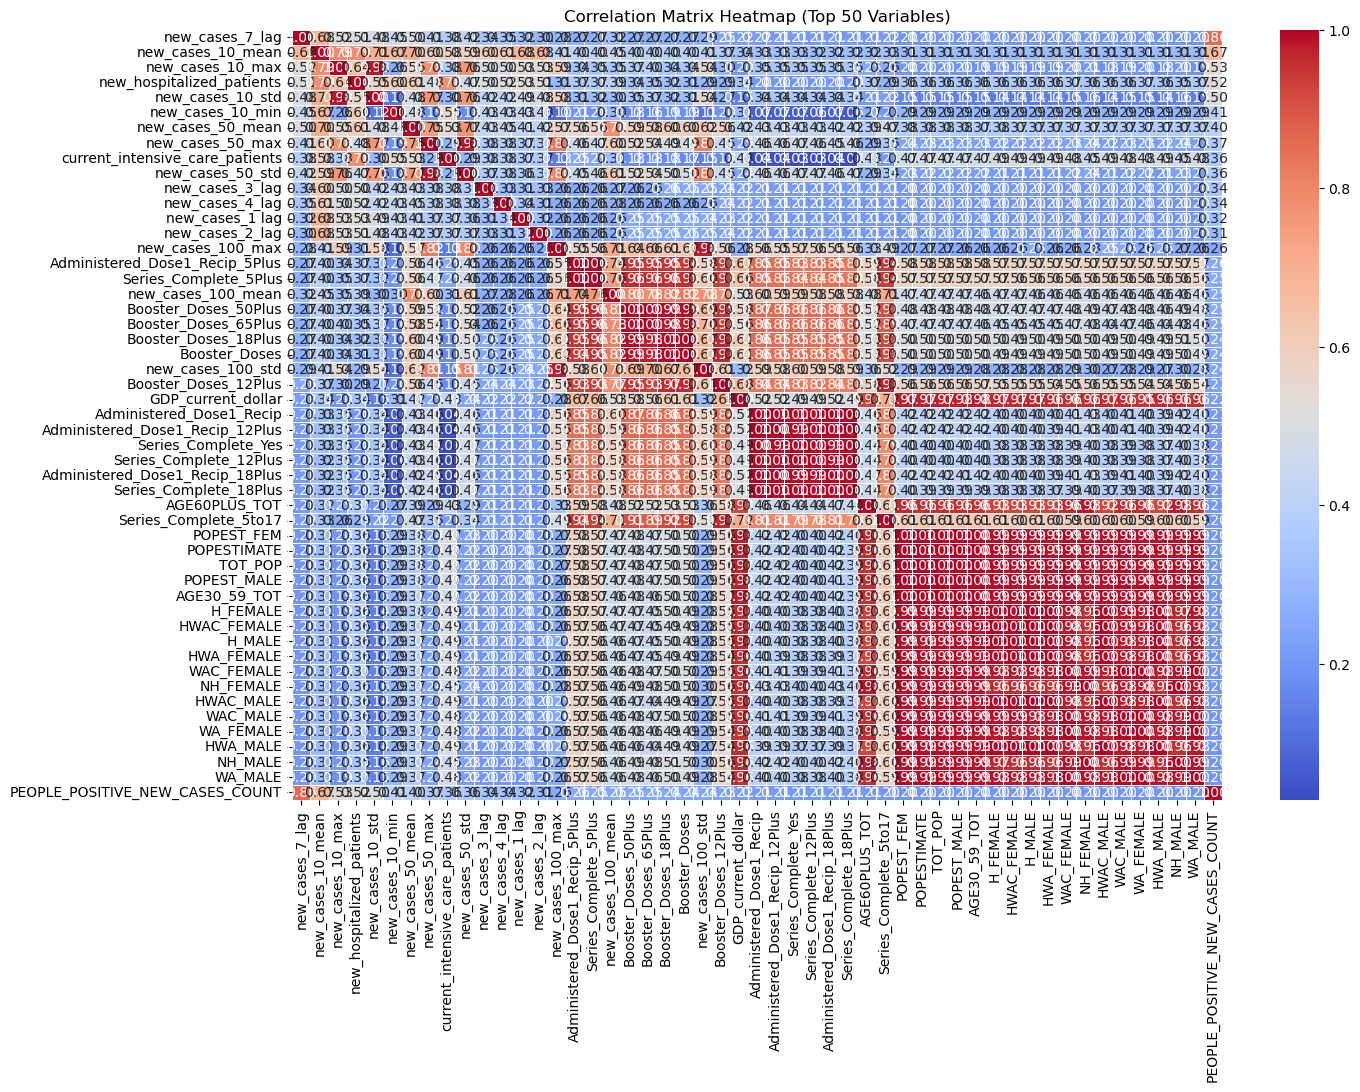

In [9]:
top_50_variables_names = top_50_variables.index.tolist()
top_50_variables_names.append('PEOPLE_POSITIVE_NEW_CASES_COUNT')  # Add 'PEOPLE_NEW_POSITIVE_CASE' to the list

df_top_50 = df1[top_50_variables_names]

correlation_matrix_top_50 = df_top_50.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_top_50, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap (Top 50 Variables)')
plt.show()

In [10]:
df1_filtered['HISP_BLACK'] = df1_filtered['HBAC_MALE'] + df1_filtered['HBAC_FEMALE'] - ((df1_filtered['HBAC_MALE'] - df1_filtered['HBA_MALE']) + (df1_filtered['HBAC_FEMALE'] - df1_filtered['HBA_FEMALE']))
df1_filtered['WHITE'] = df1_filtered['WAC_MALE'] + df1_filtered['WAC_FEMALE'] - ((df1_filtered['WAC_MALE'] - df1_filtered['WA_MALE']) + (df1_filtered['WAC_FEMALE'] - df1_filtered['WA_FEMALE']))
df1_filtered['ASIAN'] = df1_filtered['AAC_MALE'] + df1_filtered['AAC_FEMALE'] - ((df1_filtered['AAC_MALE'] - df1_filtered['AA_MALE']) + (df1_filtered['AAC_FEMALE'] - df1_filtered['AA_FEMALE']))
df1_filtered['NATIVE_AMERICAN'] = df1_filtered['IAC_MALE'] + df1_filtered['IAC_FEMALE'] - ((df1_filtered['IAC_MALE'] - df1_filtered['IA_MALE']) + (df1_filtered['IAC_FEMALE'] - df1_filtered['IA_FEMALE']))
df1_filtered['NATIVE_HAWAIIAN'] = df1_filtered['NAC_MALE'] + df1_filtered['NAC_FEMALE'] - ((df1_filtered['NAC_MALE'] - df1_filtered['NA_MALE']) + (df1_filtered['NAC_FEMALE'] - df1_filtered['NA_FEMALE']))

df1_filtered['WHITE_ASIAN'] = df1_filtered['WHITE'] + df1_filtered['ASIAN']
df1_filtered['NATIVE_PEOPLES'] = df1_filtered['NATIVE_HAWAIIAN'] + df1_filtered['NATIVE_AMERICAN']

In [11]:
df1_filtered['Administered_Dose1_Recip_12to18'] = df1_filtered['Administered_Dose1_Recip_12Plus'] - df1_filtered['Administered_Dose1_Recip_18Plus']
df1_filtered['Administered_Dose1_Recip_5to12'] = df1_filtered['Administered_Dose1_Recip_5Plus'] - df1_filtered['Administered_Dose1_Recip_12Plus']
df1_filtered['Administered_Dose1_Recip_18to65'] = df1_filtered['Administered_Dose1_Recip_18Plus'] - df1_filtered['Administered_Dose1_Recip_65Plus']
df1_filtered['Administered_Dose1_Recip_65plus'] = df1_filtered['Administered_Dose1_Recip_65Plus']

df1_filtered['Booster_Doses_12to18'] = df1_filtered['Booster_Doses_12Plus'] - df1_filtered['Booster_Doses_18Plus']
df1_filtered['Booster_Doses_18to50'] = df1_filtered['Booster_Doses_18Plus'] - df1_filtered['Booster_Doses_50Plus']
df1_filtered['Booster_Doses_50to65'] = df1_filtered['Booster_Doses_50Plus'] - df1_filtered['Booster_Doses_65Plus']
df1_filtered['Booster_Doses_65Plus'] = df1_filtered['Booster_Doses_65Plus']

df1_filtered['Series_Complete_5to12'] = df1_filtered['Series_Complete_5Plus'] - df1_filtered['Series_Complete_12Plus']
df1_filtered['Series_Complete_12Pto18'] = df1_filtered['Series_Complete_12Plus'] - df1_filtered['Series_Complete_18Plus']
df1_filtered['Series_Complete_18to65'] = df1_filtered['Series_Complete_18Plus'] - df1_filtered['Series_Complete_65Plus']
df1_filtered['Series_Complete_65Plus'] = df1_filtered['Series_Complete_65Plus']

In [12]:
columns_to_check = [
    "Administered_Dose1_Recip_5to12",
    "Administered_Dose1_Recip_18to65",
    "Administered_Dose1_Recip_65plus",
    "Booster_Doses_12to18",
    "Booster_Doses_18to50",
    "Booster_Doses_50to65",
    "Booster_Doses_65Plus",
    "Series_Complete_5to12",
    "Series_Complete_12Pto18",
    "Series_Complete_18to65",
    "Series_Complete_65Plus",
    "Administered_Dose1_Recip_12to18"
]

for column in columns_to_check:
    df1_filtered[column] = df1_filtered[column].apply(lambda x: 0 if x < 0 else x)

In [13]:
negative_values_df = df1_filtered[df1_filtered['PEOPLE_POSITIVE_NEW_CASES_COUNT'] < 0]
negative_values_df['PEOPLE_POSITIVE_NEW_CASES_COUNT']

Date
2021-01-18     -263
2021-06-04   -37566
2021-11-28       -6
2022-02-08    -4397
Name: PEOPLE_POSITIVE_NEW_CASES_COUNT, dtype: int64

In [14]:
df1_filtered['PEOPLE_POSITIVE_NEW_CASES_COUNT'] = df1_filtered['PEOPLE_POSITIVE_NEW_CASES_COUNT'].abs()

In [15]:
columns_to_drop = [
    'TOT_POP', 'WA_MALE', 'WA_FEMALE', 'BA_MALE', 'BA_FEMALE',
    'IA_MALE', 'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'NA_MALE', 'NA_FEMALE', 'TOM_MALE',
    'TOM_FEMALE', 'WAC_MALE', 'WAC_FEMALE', 'BAC_MALE', 'BAC_FEMALE', 'IAC_MALE', 'IAC_FEMALE',
    'AAC_MALE', 'AAC_FEMALE', 'NAC_MALE', 'NAC_FEMALE', 'NH_MALE', 'NH_FEMALE',
    'NHWA_MALE', 'NHWA_FEMALE', 'NHBA_MALE', 'NHBA_FEMALE', 'NHIA_MALE', 'NHIA_FEMALE',
    'NHAA_MALE', 'NHAA_FEMALE', 'NHNA_MALE', 'NHNA_FEMALE', 'NHTOM_MALE', 'NHTOM_FEMALE',
    'NHWAC_MALE', 'NHWAC_FEMALE', 'NHBAC_MALE', 'NHBAC_FEMALE', 'NHIAC_MALE', 'NHIAC_FEMALE',
    'NHAAC_MALE', 'NHAAC_FEMALE', 'NHNAC_MALE', 'NHNAC_FEMALE', 'H_MALE', 'H_FEMALE',
    'HWA_MALE', 'HWA_FEMALE', 'HBA_MALE', 'HBA_FEMALE', 'HIA_MALE', 'HIA_FEMALE',
    'HAA_MALE', 'HAA_FEMALE', 'HNA_MALE', 'HNA_FEMALE', 'HTOM_MALE', 'HTOM_FEMALE',
    'HWAC_MALE', 'HWAC_FEMALE', 'HBAC_MALE', 'HBAC_FEMALE', 'HIAC_MALE', 'HIAC_FEMALE',
    'HAAC_MALE', 'HAAC_FEMALE', 'HNAC_MALE', 'HNAC_FEMALE', 'POPESTIMATE', 
    'POPEST_MALE', 'POPEST_FEM', 'WHITE', 'ASIAN', 'NATIVE_AMERICAN', 'NATIVE_HAWAIIAN', 
    'PEOPLE_DEATH_NEW_COUNT',  
    'STATE',
    'new_deaths_10_mean', 'new_deaths_50_mean', 'new_deaths_100_mean', 'new_deaths_10_std', 
    'new_deaths_50_std', 'new_deaths_100_std', 'new_deaths_10_max', 'new_deaths_50_max', 
    'new_deaths_100_max', 'new_deaths_10_min', 'new_deaths_50_min', 'new_deaths_100_min',
    'new_deaths_1_lag', 'new_deaths_2_lag', 'new_deaths_3_lag',
    'new_deaths_4_lag', 'new_deaths_7_lag', 'new_deaths_30_lag',
    'new_deaths_50_lag',
    'Booster_Doses', 'Series_Complete_Yes', 'Completeness_pct', 
    'Administered_Dose1_Recip', 'Series_Complete_5to17',
    'Bivalent_Booster_12Plus', 'Bivalent_Booster_18Plus', 
    'Bivalent_Booster_5Plus', 'Bivalent_Booster_65Plus',
    'Booster_Doses_5Plus', 'Second_Booster_50Plus','Second_Booster_65Plus',
    'Administered_Dose1_Recip_5Plus', 'Administered_Dose1_Recip_12Plus', 'Administered_Dose1_Recip_18Plus',
    'Administered_Dose1_Recip_65Plus', 'Series_Complete_5Plus',
    'Series_Complete_12Plus', 'Series_Complete_18Plus', 'Series_Complete_65Plus',
    'Booster_Doses_5Plus', 'Booster_Doses_12Plus', 'Booster_Doses_18Plus', 'Booster_Doses_50Plus',
    'Booster_Doses_65Plus', 'Second_Booster_50Plus', 'Second_Booster_65Plus', 'Bivalent_Booster_5Plus',
    'Bivalent_Booster_12Plus', 'Bivalent_Booster_18Plus', 'Bivalent_Booster_65Plus', 'vaccination_rate_complete',
    'dew_point', 'rainfall_mm',
    'prop_age04', 'prop_age59', 'prop_age6064', 'prop_age8084', 'prop_age85plus', 'booster_rate'
    ]



df1_filtered = df1_filtered.drop(columns=columns_to_drop)

In [16]:
correlation = df1_filtered.corrwith(df1_filtered['PEOPLE_POSITIVE_NEW_CASES_COUNT'])

sorted_correlation = correlation.abs().sort_values(ascending=False)

top_50_variables = sorted_correlation.head(51)[1:]

print(top_50_variables)

new_cases_7_lag                    0.859412
new_cases_10_mean                  0.673993
new_cases_10_max                   0.530657
new_hospitalized_patients          0.519919
new_cases_10_std                   0.496223
new_cases_10_min                   0.405323
new_cases_50_mean                  0.401710
new_cases_50_max                   0.372103
current_intensive_care_patients    0.363768
new_cases_50_std                   0.360762
new_cases_3_lag                    0.345116
new_cases_4_lag                    0.336940
new_cases_1 lag                    0.324740
new_cases_2_lag                    0.308917
new_cases_100_max                  0.256252
new_cases_100_mean                 0.249936
Booster_Doses_50to65               0.246212
new_cases_100_std                  0.240758
Booster_Doses_18to50               0.231863
Series_Complete_12Pto18            0.230702
Administered_Dose1_Recip_12to18    0.229881
GDP_current_dollar                 0.218313
Administered_Dose1_Recip_18to65 

In [17]:
top_50_variables_names = top_50_variables.index.tolist()
top_50_variables_names.append('PEOPLE_POSITIVE_NEW_CASES_COUNT')
df_top_50 = df1_filtered[top_50_variables_names]

correlation_matrix = df_top_50.corr()

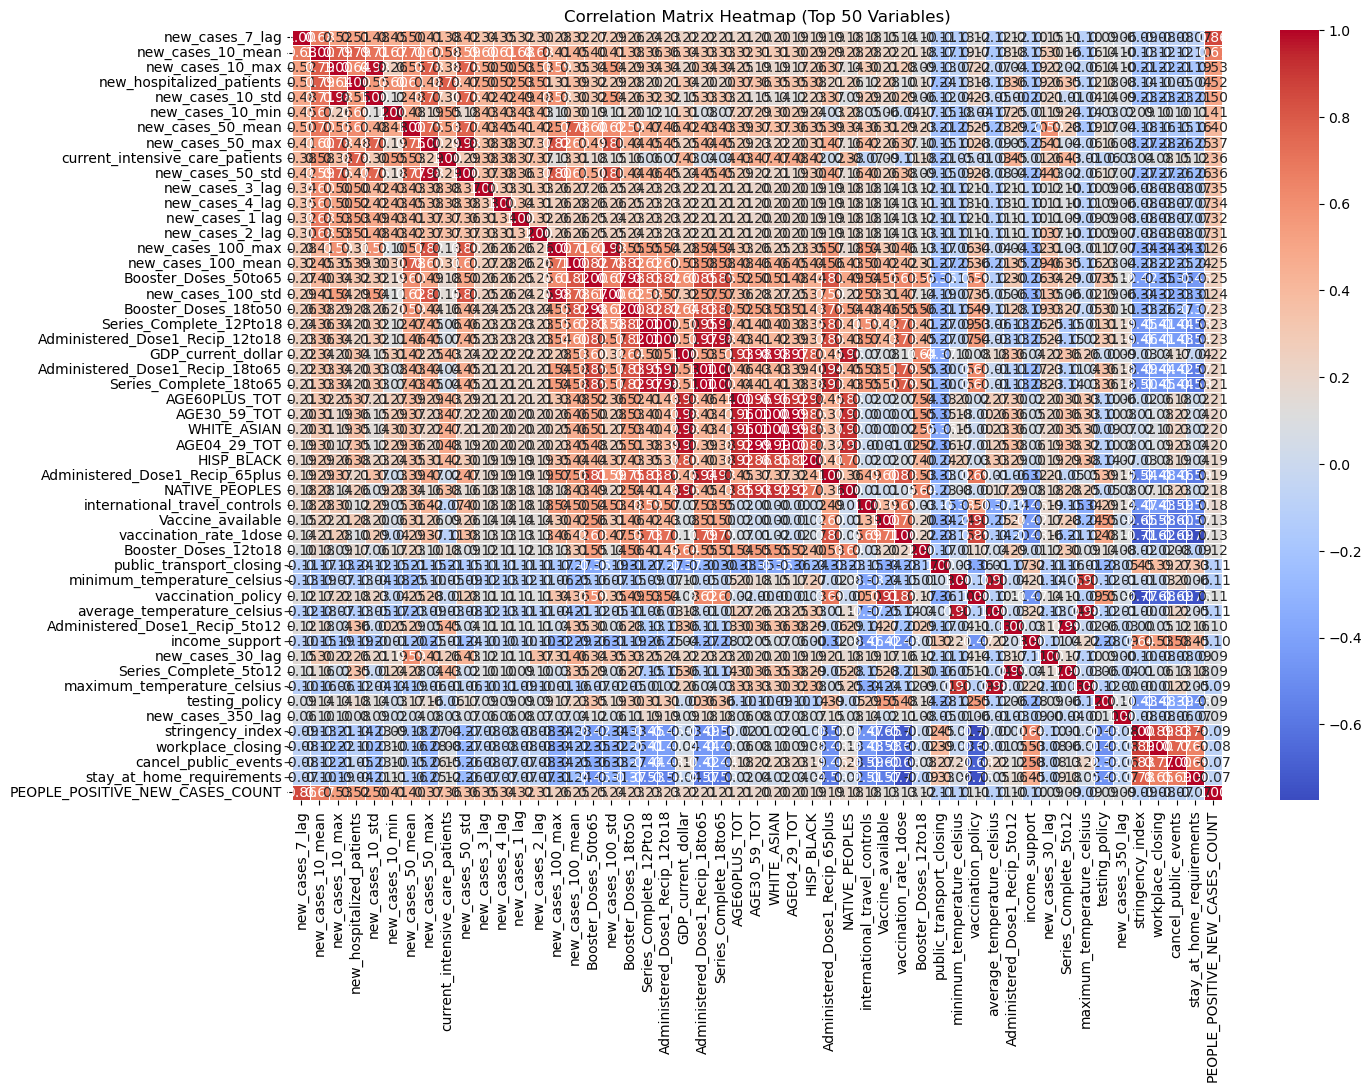

In [18]:
top_50_variables_names = top_50_variables.index.tolist()
top_50_variables_names.append('PEOPLE_POSITIVE_NEW_CASES_COUNT') 

df_top_50 = df1_filtered[top_50_variables_names]

correlation_matrix_top_50 = df_top_50.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_top_50, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap (Top 50 Variables)')
plt.show()

In [19]:
numeric_cols = df1_filtered.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['PEOPLE_POSITIVE_NEW_CASES_COUNT', 'PROVINCE_STATE_NAME', 'Date']]
                

X = df1_filtered[numeric_cols]

X_const = add_constant(X)

vif_data = pd.DataFrame({
    "Feature": X_const.columns,
    "VIF": [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
})

infinite_vif_features = vif_data[vif_data['VIF'] > 100]
infinite_vif_features = infinite_vif_features.sort_values(by='VIF', ascending=False)

print(infinite_vif_features)

                            Feature           VIF
49                     AGE30_59_TOT  19171.918048
48                     AGE04_29_TOT  16106.043498
52                      WHITE_ASIAN   2821.822834
50                    AGE60PLUS_TOT   1992.193390
1                GDP_current_dollar   1311.453504
0                             const    786.961118
63           Series_Complete_18to65    772.269851
56  Administered_Dose1_Recip_18to65    685.859314
54  Administered_Dose1_Recip_12to18    529.272308
61            Series_Complete_5to12    411.225794
62          Series_Complete_12Pto18    356.325628
55   Administered_Dose1_Recip_5to12    342.125777
60             Booster_Doses_50to65    250.973931
59             Booster_Doses_18to50    169.495538
4       average_temperature_celsius    168.931905
2                   personal_income    162.608135
53                   NATIVE_PEOPLES    160.570197
41                 new_cases_10_max    149.297990
38                 new_cases_10_std    130.661417


In [20]:
df1_filtered

,PROVINCE_STATE_NAME,PEOPLE_POSITIVE_NEW_CASES_COUNT,GDP_current_dollar,personal_income,Vaccine_available,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,relative_humidity,new_hospitalized_patients,...,Administered_Dose1_Recip_12to18,Administered_Dose1_Recip_5to12,Administered_Dose1_Recip_18to65,Administered_Dose1_Recip_65plus,Booster_Doses_12to18,Booster_Doses_18to50,Booster_Doses_50to65,Series_Complete_5to12,Series_Complete_12Pto18,Series_Complete_18to65
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-01,California,5,3068809392,3592144,0,17.339506,8.361111,26.848765,51.629709,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-01,Michigan,0,530231089,3884676,0,-0.100000,-7.583333,8.644444,60.496067,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-01,Georgia,0,637930585,6576964,0,19.330556,15.622222,24.047223,81.085526,110.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-01,New York,0,722424311,3069715,0,11.416667,2.744445,19.000000,33.666530,6.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-01,North Carolina,0,601148746,4549547,0,8.858334,3.080556,13.566667,50.915916,165.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29,Georgia,0,767377566,7172580,1,17.972222,8.911111,26.783333,55.560382,46.0,...,404998.0,164980.0,4081916.0,1310218.0,52690.0,670159.0,596660.0,124039.0,333112.0,3547748.0
2022-04-29,Florida,0,1439065029,3671683,1,23.850000,18.605556,29.866667,65.982197,220.0,...,955836.0,405903.0,10681883.0,4707322.0,122641.0,1487009.0,1568544.0,320499.0,797059.0,9016271.0
2022-04-29,California,18896,3641643425,3888196,1,14.783333,5.744444,24.544444,45.479236,170.0,...,2472156.0,1470097.0,22114317.0,5911284.0,632287.0,6084195.0,3713985.0,1228388.0,2185351.0,19159974.0


## PCA FILTERING

In [21]:
timestamp_column = df1_filtered.index
target_column = ['PEOPLE_POSITIVE_NEW_CASES_COUNT']
exclude_columns = ['PROVINCE_STATE_NAME','Date']

In [22]:
predictor_columns = [col for col in df1_filtered.columns if col not in (*target_column, *exclude_columns)]

X = df1_filtered[predictor_columns].values
y = df1_filtered[target_column].values

In [23]:
sc = StandardScaler()
X_std = sc.fit_transform(X)
pca = PCA()
X_pca = pca.fit(X_std)

Text(0, 0.5, 'cumulative explained variance')

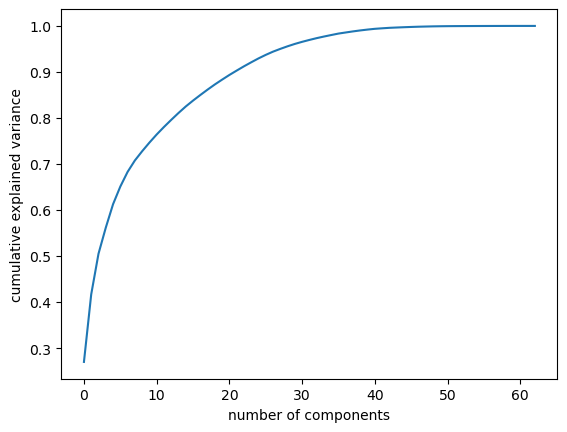

In [24]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [25]:
pca = PCA(n_components = 0.99)
X_pca = pca.fit_transform(X_std)

print(pca.n_components_)

39


In [26]:
scaler = StandardScaler()
scaler.fit(X)
X_zscored = scaler.transform(X)
num_components = 41
pca = PCA(n_components=num_components)
X_new = pca.fit_transform(X_zscored)

explained_variance_ratio = pca.explained_variance_ratio_

In [27]:
loadings = pca.components_

loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=predictor_columns)

absolute_loadings_sum = loadings_df.abs().sum(axis=1)

top_features = absolute_loadings_sum.sort_values(ascending=False)

print(top_features)

new_cases_10_min                   5.221524
income_support                     5.218427
contact_tracing                    5.055190
personal_income                    5.029008
Booster_Doses_12to18               4.974231
                                     ...   
Administered_Dose1_Recip_18to65    1.927615
Series_Complete_18to65             1.909702
AGE04_29_TOT                       1.820690
WHITE_ASIAN                        1.735557
AGE30_59_TOT                       1.640101
Length: 63, dtype: float64


In [28]:
top_50_features = absolute_loadings_sum.nlargest(50)
top_50_features

new_cases_10_min                     5.221524
income_support                       5.218427
contact_tracing                      5.055190
personal_income                      5.029008
Booster_Doses_12to18                 4.974231
new_cases_2_lag                      4.950523
restrictions_on_internal_movement    4.908908
testing_policy                       4.904699
facial_coverings                     4.857656
debt_relief                          4.758930
new_cases_3_lag                      4.715049
current_intensive_care_patients      4.685747
public_information_campaigns         4.668515
new_cases_50_min                     4.660900
new_cases_30_lag                     4.653183
international_travel_controls        4.626385
workplace_closing                    4.625300
public_transport_closing             4.563464
school_closing                       4.414129
stay_at_home_requirements            4.368534
new_cases_100_min                    4.328825
new_cases_1 lag                   

In [29]:
columns = top_50_features.index.tolist()
columns

['new_cases_10_min',
 'income_support',
 'contact_tracing',
 'personal_income',
 'Booster_Doses_12to18',
 'new_cases_2_lag',
 'restrictions_on_internal_movement',
 'testing_policy',
 'facial_coverings',
 'debt_relief',
 'new_cases_3_lag',
 'current_intensive_care_patients',
 'public_information_campaigns',
 'new_cases_50_min',
 'new_cases_30_lag',
 'international_travel_controls',
 'workplace_closing',
 'public_transport_closing',
 'school_closing',
 'stay_at_home_requirements',
 'new_cases_100_min',
 'new_cases_1 lag',
 'new_cases_4_lag',
 'new_cases_7_lag',
 'relative_humidity',
 'new_cases_50_lag',
 'cancel_public_events',
 'HISP_BLACK',
 'new_hospitalized_patients',
 'restrictions_on_gatherings',
 'new_cases_150_lag',
 'new_cases_350_lag',
 'Vaccine_available',
 'new_cases_10_std',
 'new_cases_50_mean',
 'new_cases_10_max',
 'Administered_Dose1_Recip_5to12',
 'new_cases_100_max',
 'NATIVE_PEOPLES',
 'new_cases_100_mean',
 'Series_Complete_5to12',
 'new_cases_50_std',
 'new_cases_10

In [30]:
columns = columns + ['PEOPLE_POSITIVE_NEW_CASES_COUNT', 'PROVINCE_STATE_NAME']

columns = list(dict.fromkeys(columns))

df_filtered = df1_filtered[columns]
df_filtered

,new_cases_10_min,income_support,contact_tracing,personal_income,Booster_Doses_12to18,new_cases_2_lag,restrictions_on_internal_movement,testing_policy,facial_coverings,debt_relief,...,new_cases_100_std,new_cases_50_max,Booster_Doses_18to50,vaccination_policy,Series_Complete_12Pto18,vaccination_rate_1dose,maximum_temperature_celsius,Administered_Dose1_Recip_12to18,PEOPLE_POSITIVE_NEW_CASES_COUNT,PROVINCE_STATE_NAME
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-01,5.0,0.0,1.0,3592144,0.0,186.0,0.5,2.0,0.5,1.0,...,1902.926701,1046.0,0.0,2.5,0.0,0.000000,26.848765,0.0,5,California
2020-03-01,0.0,0.0,1.0,3884676,0.0,3346.0,0.0,1.0,0.0,0.0,...,3377.417747,6527.0,0.0,0.0,0.0,0.000000,8.644444,0.0,0,Michigan
2020-03-01,0.0,0.0,1.0,6576964,0.0,0.0,0.5,1.5,0.5,0.5,...,39097.128608,36371.0,0.0,2.5,0.0,0.000000,24.047223,0.0,0,Georgia
2020-03-01,0.0,0.0,1.0,3069715,0.0,615.0,0.5,2.0,1.0,0.5,...,1939.115662,615.0,0.0,2.5,0.0,0.000000,19.000000,0.0,0,New York
2020-03-01,0.0,0.0,1.0,4549547,0.0,6434.0,0.5,2.0,1.0,0.0,...,2833.434820,6434.0,0.0,2.5,0.0,0.000000,13.566667,0.0,0,North Carolina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29,0.0,0.0,1.0,7172580,52690.0,5594.0,1.0,3.0,2.0,1.0,...,6145.677830,8887.0,670159.0,5.0,333112.0,0.546644,26.783333,404998.0,0,Georgia
2022-04-29,0.0,0.0,1.0,3671683,122641.0,0.0,1.0,3.0,1.0,1.0,...,39097.128608,36371.0,1487009.0,5.0,797059.0,0.753405,29.866667,955836.0,0,Florida
2022-04-29,0.0,0.0,1.0,3888196,632287.0,1852.0,1.0,3.0,2.0,1.0,...,35884.447309,18896.0,6084195.0,5.0,2185351.0,0.819798,24.544444,2472156.0,18896,California


In [31]:
df_filtered.index = pd.to_datetime(df_filtered.index)

In [32]:
state_mapping = {
    'California': 0,
    'Texas': 1,
    'Illinois': 2,
    'New York': 3,
    'Florida': 4,
    'Pennsylvania': 5,
    'Ohio': 6,
    'North Carolina': 7,
    'Georgia': 8,
    'Michigan': 9
}

df_filtered['STATE'] = df_filtered['PROVINCE_STATE_NAME'].map(state_mapping)

/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_15648/2499427024.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['STATE'] = df_filtered['PROVINCE_STATE_NAME'].map(state_mapping)


In [33]:
desktop_path = "/Users/asherbank/Desktop/"

df_filtered.to_csv(desktop_path + "finalreport_featureselection_allstates.csv", index=True)

In [34]:
state_dataframes = {}
states = ['California', 'Texas', 'Florida', 'New York', 'Pennsylvania', 'Illinois', 'Ohio', 'Georgia', 'North Carolina', 'Michigan']

for state in states:
    df_subset_state = df_filtered[df_filtered['PROVINCE_STATE_NAME'] == state].copy()
    
    state_dataframes[state] = df_subset_state

In [35]:
sub_CA = state_dataframes['California']
sub_TX = state_dataframes['Texas']
sub_FL = state_dataframes['Florida']
sub_NY = state_dataframes['New York']
sub_PA = state_dataframes['Pennsylvania']
sub_IL = state_dataframes['Illinois']
sub_NC = state_dataframes['North Carolina']
sub_OH = state_dataframes['Ohio']
sub_GA = state_dataframes['Georgia']
sub_MI = state_dataframes['Michigan']

sub_CA = sub_CA.drop(columns=['PROVINCE_STATE_NAME'])
sub_TX = sub_TX.drop(columns=['PROVINCE_STATE_NAME'])
sub_FL = sub_FL.drop(columns=['PROVINCE_STATE_NAME'])
sub_NY = sub_NY.drop(columns=['PROVINCE_STATE_NAME'])
sub_PA = sub_PA.drop(columns=['PROVINCE_STATE_NAME'])
sub_IL = sub_IL.drop(columns=['PROVINCE_STATE_NAME'])
sub_NC = sub_NC.drop(columns=['PROVINCE_STATE_NAME'])
sub_OH = sub_OH.drop(columns=['PROVINCE_STATE_NAME'])
sub_GA = sub_GA.drop(columns=['PROVINCE_STATE_NAME'])
sub_MI = sub_MI.drop(columns=['PROVINCE_STATE_NAME'])

In [36]:
desktop_path = "/Users/asherbank/Desktop/"

sub_CA.to_csv(desktop_path + "CA.csv", index=True)
sub_TX.to_csv(desktop_path + "TX.csv", index=True)
sub_FL.to_csv(desktop_path + "FL.csv", index=True)
sub_NY.to_csv(desktop_path + "NY.csv", index=True)
sub_PA.to_csv(desktop_path + "PA.csv", index=True)
sub_IL.to_csv(desktop_path + "IL.csv", index=True)
sub_NC.to_csv(desktop_path + "NC.csv", index=True)
sub_OH.to_csv(desktop_path + "OH.csv", index=True)
sub_GA.to_csv(desktop_path + "GA.csv", index=True)
sub_MI.to_csv(desktop_path + "MI.csv", index=True)